### Test the dataset maker and train a model using FastAI approach
The dataset is built using opensoundscape's AudioSplittingDataset and AudioFileDataset, then labelled using a custom heuristic. This notebook attempts to run a training cycle by passing the Opso DataLoader into a FastAI Learner. 

In [110]:
# imports
from pathlib import Path
import sys
import pandas as pd
BASE_PATH = Path.cwd().parent.parent
sys.path.append(str(BASE_PATH))
from src.utils import display_all, plot_locations, keep_cols
import src.data
import src.data.build
import opensoundscape as opso
from opensoundscape.preprocess.utils import show_tensor
import torch

In [111]:
# load the raw data
data_path = Path.cwd().parent.parent / "data"
train_df_path = Path.cwd().parent.parent / "data" / "processed" / "train_set"
df_train = pd.read_pickle(train_df_path / "train_set.pkl")

In [112]:
df_train.head()

,Unnamed: 0,organization,project,project_id,location,location_id,recording_date_time,recording_id,task_method,task_id,...,spectrogram_url,clip_url,sensorId,tasks,status,recording_url,latitude,longitude,location_buffer_m,file_type
1,1752,BU,Amplitude Quality Testing 2020,293,AM-403-SE2,36043,2017-06-15 04:46:00,92051,NaN,87956,...,https://wildtrax-aru.s3.us-west-2.amazonaws.com/d7ede4f0-7336-462b-9e64-43068e1fbd86/9f686a1bc16b4bbaaa8db056d2553c4c.jpg,https://wildtrax-aru.s3.us-west-2.amazonaws.com/d7ede4f0-7336-462b-9e64-43068e1fbd86/9f686a1bc16b4bbaaa8db056d2553c4c.mp3,ARU,174,Published - Private,https://wildtrax-aru.s3.us-west-2.amazonaws.com/d7ede4f0-7336-462b-9e64-43068e1fbd86/92051.flac,54.607774,-110.681271,NaN,flac
2,1758,BU,Amplitude Quality Testing 2020,293,AM-403-SE2,36043,2017-06-15 04:46:00,92051,NaN,87898,...,https://wildtrax-aru.s3.us-west-2.amazonaws.com/d7ede4f0-7336-462b-9e64-43068e1fbd86/38429b4f152045b1b5799f37a1a4ecc0.jpg,https://wildtrax-aru.s3.us-west-2.amazonaws.com/d7ede4f0-7336-462b-9e64-43068e1fbd86/38429b4f152045b1b5799f37a1a4ecc0.mp3,ARU,174,Published - Private,https://wildtrax-aru.s3.us-west-2.amazonaws.com/d7ede4f0-7336-462b-9e64-43068e1fbd86/92051.flac,54.607774,-110.681271,NaN,flac
3,1761,BU,Amplitude Quality Testing 2020,293,AM-403-SE2,36043,2017-06-15 04:46:00,92051,NaN,87840,...,https://wildtrax-aru.s3.us-west-2.amazonaws.com/d7ede4f0-7336-462b-9e64-43068e1fbd86/d0d13942bf1341a4b2012d9eac9c4be7.jpg,https://wildtrax-aru.s3.us-west-2.amazonaws.com/d7ede4f0-7336-462b-9e64-43068e1fbd86/d0d13942bf1341a4b2012d9eac9c4be7.mp3,ARU,174,Published - Private,https://wildtrax-aru.s3.us-west-2.amazonaws.com/d7ede4f0-7336-462b-9e64-43068e1fbd86/92051.flac,54.607774,-110.681271,NaN,flac
4,1764,BU,Amplitude Quality Testing 2020,293,AM-403-SE2,36043,2017-06-15 04:46:00,92051,NaN,87927,...,https://wildtrax-aru.s3.us-west-2.amazonaws.com/d7ede4f0-7336-462b-9e64-43068e1fbd86/b87987fb810f4647ada45db54fd65d38.jpg,https://wildtrax-aru.s3.us-west-2.amazonaws.com/d7ede4f0-7336-462b-9e64-43068e1fbd86/b87987fb810f4647ada45db54fd65d38.mp3,ARU,174,Published - Private,https://wildtrax-aru.s3.us-west-2.amazonaws.com/d7ede4f0-7336-462b-9e64-43068e1fbd86/92051.flac,54.607774,-110.681271,NaN,flac
5,1767,BU,Amplitude Quality Testing 2020,293,AM-403-SE2,36043,2017-06-15 04:46:00,92051,NaN,87840,...,https://wildtrax-aru.s3.us-west-2.amazonaws.com/d7ede4f0-7336-462b-9e64-43068e1fbd86/603d0b9b39f244698a5805f10ab0d9e0.jpg,https://wildtrax-aru.s3.us-west-2.amazonaws.com/d7ede4f0-7336-462b-9e64-43068e1fbd86/603d0b9b39f244698a5805f10ab0d9e0.mp3,ARU,174,Published - Private,https://wildtrax-aru.s3.us-west-2.amazonaws.com/d7ede4f0-7336-462b-9e64-43068e1fbd86/92051.flac,54.607774,-110.681271,NaN,flac


downloading 0 clips
skipped 0 previously downloaded files


/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/src/data/build.py:166: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df.loc[df.target_presence == False][df.target_absence == False].index)


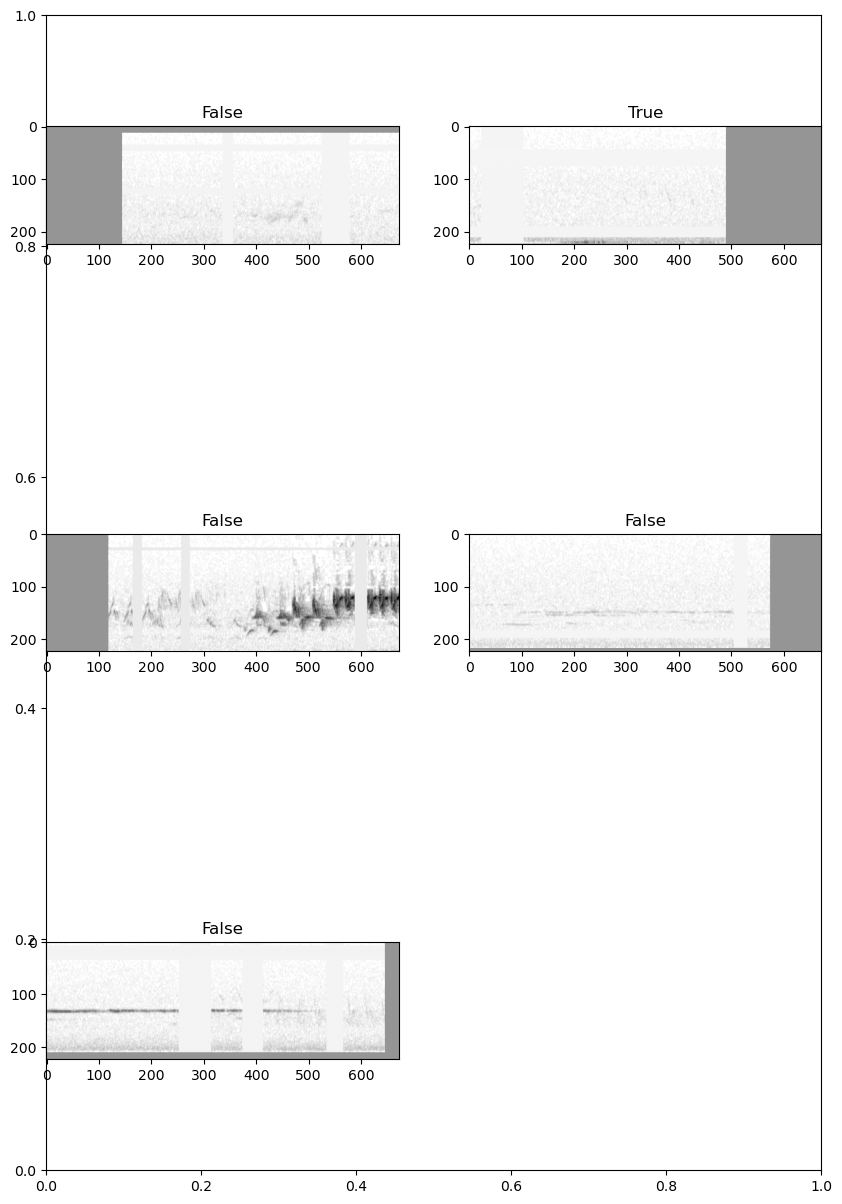

In [113]:
train_dataset, valid_dataset = src.data.build.dataset_from_df(df_train, target_species = "OSFL", download_n=0)

### Can these datasets be interfaced with the fastai dataloaders and training schedules?

In [114]:
from fastai.vision.core import DataLoaders
from fastai.vision.core import DataLoader
# from torch.utils.data._utils.collate import default_collate
# from opensoundscape.ml.utils import collate_audio_samples_to_tensors

In [115]:
from fastai import *
from fastai.vision.all import *

In [116]:
class AudioDatasetWrapper():
    '''
    Alternative behaviour to the __getitem__ method of AudioFileDataset.
    Returns a tuple of the data and the label.
    '''
    def __init__(self, audio_dataset, greyscale_to_rgb=False):
        self.audio_dataset = audio_dataset
        self.greyscale_to_rgb = greyscale_to_rgb

    def __len__(self):
        return len(self.audio_dataset)

    def __getitem__(self, idx):
        # Extract the data tensor
        # Extract the label as an integer in a tensor
        x = self.audio_dataset[idx].data
        y = torch.tensor(int(self.audio_dataset[idx].labels.iloc[0]))

        if self.greyscale_to_rgb:
            x = x.repeat(3, 1, 1)
        
        return (x, y)

def wrap(dataset):
    return AudioDatasetWrapper(dataset)


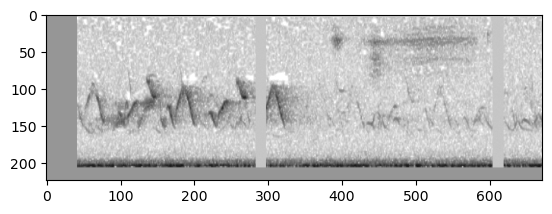

In [117]:
# Has augmentations.
show_tensor(train_dataset[0].data)

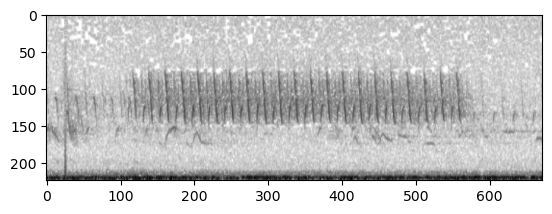

In [118]:
# no augmentations on the validation set. 
show_tensor(valid_dataset[0].data)

In [119]:
wrapped_train_ds = AudioDatasetWrapper(train_dataset, greyscale_to_rgb=True)
wrapped_valid_ds = AudioDatasetWrapper(valid_dataset, greyscale_to_rgb=True)
train_dl = DataLoader(wrapped_train_ds, bs=2)
valid_dl = DataLoader(wrapped_valid_ds, bs=2)

In [120]:
dls = DataLoaders(train_dl, valid_dl, device="mps")
len(dls[0])

3841

In [121]:
# learn = Learner(dls, resnet18(), metrics=accuracy, loss_func=nn.CrossEntropyLoss())
# learn.fit_one_cycle(1, 1e-3)

### Training is prohibitively slow using this approach. 

Could be due to :
- Custom AudioDatasetWrapper or other code containing python inefficiencies which should be replaced with tensor operations. 
- OpenSoundScape provides a collate function for getting tuple of tensors from an AudioFileDataset. Tried using this but needs further work. 
- It could be that the process of converting a clip to a spectrogram is just slow, in which case a speedup is possible by precomputing spectrograms. This was tested at the start of the project and it does result in a fast training cycle. 

### Try on a sample of the data just to verify that the training loop does work even if it's slow

In [193]:
# Make a small sample and check the quantities of each class. 
small_train_ds = train_dataset.sample(n=500)
small_valid_ds = valid_dataset.sample(n=200)

small_train_ds.class_counts(), small_valid_ds.class_counts()

((Index(['target_presence', 'target_absence'], dtype='object'),
  array([ 44, 456])),
 (Index(['target_presence', 'target_absence'], dtype='object'),
  array([ 12, 188])))

In [194]:
wrapped_train_ds = AudioDatasetWrapper(small_train_ds, greyscale_to_rgb=True)
wrapped_valid_ds = AudioDatasetWrapper(small_valid_ds, greyscale_to_rgb=True)
train_dl = DataLoader(wrapped_train_ds, bs=16)
valid_dl = DataLoader(wrapped_valid_ds, bs=16)

In [195]:
dls = DataLoaders(train_dl, valid_dl, device="mps")

In [200]:
dls.one_batch()[0].shape

torch.Size([16, 3, 224, 672])

In [43]:
learn = Learner(dls, resnet18(), metrics=accuracy, loss_func=nn.CrossEntropyLoss())
learn.fit_one_cycle(4, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.740602,0.595447,0.870000,00:47
1,1.166740,0.375777,0.885000,00:47
2,0.699790,0.362530,0.885000,01:00
3,0.507780,0.363070,0.885000,01:06


As shown here, on a subset of 800 spectrograms, the training loop is too slow and isn't showing any convergence. We can see the coarse nature of the data as one sample from the validation set gets classified differently causing a tiny increase in accuracy. 

###  Try using the opensoundscape custom collate function

This might be quicker

In [55]:
type(train_dataset[0])

opensoundscape.sample.AudioSample

__collate_audio_samples_to_tensors__ takes a list of AudioSamples and batches them into tensors. This is the behaviour we need, but I haven't yet found a quick way to make a list of the AudioSamples in the AudioFileDataset. 

In [180]:
collate_test = opso.ml.utils.collate_audio_samples_to_tensors([train_dataset[i] for i in range(4)])
collate_test[0].shape, collate_test[1].shape

(torch.Size([4, 1, 224, 672]), torch.Size([4, 2]))

The leading dimension is the batch dimension. 

In [209]:
train_dataloader = DataLoader(
    train_dataset,
    bs=16,
    shuffle=True,
    before_batch = opso.ml.utils.collate_audio_samples_to_tensors, # either this or the collate_fn
    # collate_fn = opso.ml.utils.collate_audio_samples_to_tensors
)
valid_dataloader = DataLoader(
    valid_dataset,
    bs=16,
    shuffle=True,
    before_batch = opso.ml.utils.collate_audio_samples_to_tensors,
    # collate_fn = opso.ml.utils.collate_audio_samples_to_tensors
)


In [210]:
train_dataloader.one_batch()

RuntimeError: Error when trying to collate the data into batches with fa_collate, at least two tensors in the batch are not the same size.

Mismatch found on axis 0 of the batch and is of type `Tensor`:
	Item at index 0 has shape: torch.Size([1, 224, 672])
	Item at index 1 has shape: torch.Size([2])

Please include a transform in `after_item` that ensures all data of type Tensor is the same size

If we pass opso's custom collate to collate_fn:

The datalaoder loads, but calling `dls.one_batch()`, returns an error:  `TypeError: object of type 'AudioSample' has no len()`

If we pass it to before_batch:

`Mismatch found on axis 0 of the batch and is of type `Tensor`:
	Item at index 0 has shape: torch.Size([1, 224, 672])
	Item at index 1 has shape: torch.Size([2])

Please include a transform in `after_item` that ensures all data of type Tensor is the same size`

In [186]:
dls = DataLoaders(train_dataloader, valid_dataloader, device="cpu")

In [189]:
dls.one_batch()

RuntimeError: Error when trying to collate the data into batches with fa_collate, at least two tensors in the batch are not the same size.

Mismatch found on axis 0 of the batch and is of type `Tensor`:
	Item at index 0 has shape: torch.Size([1, 224, 672])
	Item at index 1 has shape: torch.Size([2])

Please include a transform in `after_item` that ensures all data of type Tensor is the same size

In [184]:
learn = Learner(dls, resnet18(), metrics=accuracy, loss_func=nn.CrossEntropyLoss())
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: Error when trying to collate the data into batches with fa_collate, at least two tensors in the batch are not the same size.

Mismatch found on axis 0 of the batch and is of type `Tensor`:
	Item at index 0 has shape: torch.Size([1, 224, 672])
	Item at index 1 has shape: torch.Size([2])

Please include a transform in `after_item` that ensures all data of type Tensor is the same size

### Check what order the preprocessing happens in opso


In [167]:
train_dataset.preprocessor.pipeline

load_audio                              Action calling <bound method Audio.from_file of <class 'opensoundscape.audio.Audio'>>
random_trim_audio                                            Augmentation Action calling <function trim_audio at 0x28b49ecb0>
trim_audio                                                                Action calling <function trim_audio at 0x28b49ecb0>
to_spec              Action calling <bound method Spectrogram.from_audio of <class 'opensoundscape.spectrogram.Spectrogram'>>
bandpass                                                        Action calling <function Spectrogram.bandpass at 0x17e240d30>
to_tensor                                                                                                              Action
time_mask                                                     Augmentation Action calling <function time_mask at 0x28b49fd90>
frequency_mask                                           Augmentation Action calling <function frequency_mask at 0x28b

If we preprocess the spectrograms and save them to disk, we lose the flexibility to easily switch between different spectrogram parameter settings. Mixup would be affected too, since this should be applied at the audio level. The rest of the hyperparameters would be applicable to a preprocessed spectrogram. 


In [ ]:
# osfl_dl = DataLoader(training_dataset, bs=16, before_batch = custom_collate)
# osfl_dl.one_batch()

The \__getitem__ method contained in the AudioDataSet doesn't directly return the tensors. Fastai expects the DataSet to be an iterable of tensors, so we'll make a custom collate function to provide these:

### Problem: the tensors from different recordings were being converted to tensors of different sizes. 

Look into why this is - the spectrograms need to all be the same dimensions. Fixed by setting a spectrogram height and width parameter, but could look further into this and find a better way of enabling same size tensors. 

This is now fixed by forcing resize of the spectrogram during preprocess stage. 